I began by printing out a few of the rows of the data and visualising its distribution amongst the different flair types.

In [78]:
import pandas as pd
data = pd.read_csv('redditData.csv')

In [79]:
data.head()

,title,selftext,link_flair_text,num_comments,num_crossposts,score
0,Review on hasmukh (netflix series ),NaN,Non-Political,0,0,1
1,President approves ordinance making violence a...,NaN,Non-Political,1,0,1
2,Amazon Delivering to more Pincodes,[removed],Coronavirus,0,0,1
3,Is Japan Ready For Long Battle Against COVID-19?,NaN,Coronavirus,0,0,1
4,Chinese Communism Will Be Dealt By The Entire ...,NaN,Coronavirus,0,0,1


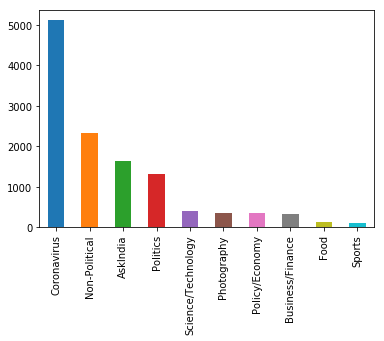

In [81]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
data['link_flair_text'].value_counts().plot(ax=ax, kind='bar')

I then calculated the number of posts with 'selftext' (body) as null, deleted or removed and replaced such instances with an empty string, "".

In [82]:
data['selftext'].isna().sum()

8235

In [83]:
(data['selftext']=='[deleted]').sum()

395

In [84]:
(data['selftext']=='[removed]').sum()

1371

In [85]:
data['selftext'] = data['selftext'].replace('[deleted]', '')
data['selftext'] = data['selftext'].replace('[removed]', '')

In [86]:
data = data.fillna('')

In [87]:
data.head(10)

,title,selftext,link_flair_text,num_comments,num_crossposts,score
0,Review on hasmukh (netflix series ),,Non-Political,0,0,1
1,President approves ordinance making violence a...,,Non-Political,1,0,1
2,Amazon Delivering to more Pincodes,,Coronavirus,0,0,1
3,Is Japan Ready For Long Battle Against COVID-19?,,Coronavirus,0,0,1
4,Chinese Communism Will Be Dealt By The Entire ...,,Coronavirus,0,0,1
5,Earth Day 2020: How a group of citizens revive...,,Non-Political,0,0,1
6,I know this question has been answered earlier...,,AskIndia,0,0,1
7,वह मजबूर हैं भिकारी नही।,,Non-Political,0,0,1
8,"What does shana lala, mean?","Hello. Just watched the movie and heard "" mera...",Non-Political,1,0,1
9,A narcissistic individual whose career is in a...,,Non-Political,3,0,1


Further analysis revealed that all flair types had empty 'selftext' values in majority of their reddit submissions.

In [88]:
data[(data['selftext']=='')].count()

title              10001
selftext           10001
link_flair_text    10001
num_comments       10001
num_crossposts     10001
score              10001
dtype: int64

In [89]:
data[(data['selftext']=='')].groupby(['link_flair_text']).size()

link_flair_text
AskIndia               814
Business/Finance       268
Coronavirus           4574
Food                   118
Non-Political         1992
Photography            345
Policy/Economy         280
Politics              1152
Science/Technology     365
Sports                  93
dtype: int64

In [93]:
data.describe()

,num_comments,num_crossposts,score
count,12063.000000,12063.000000,12063.000000
mean,9.096659,0.007378,10.192738
std,112.143761,0.150262,88.940403
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000
75%,5.000000,0.000000,1.000000
max,11630.000000,7.000000,3456.000000


There were no records with the flair label as null.

num_comments had a value of 0 for a lot of the records (roughly half). Moreover, num_crossposts was mostly zero and score value was mostly 1.

The box plots confirmed that the distributions of these three variables were not varied enough to help with the classification task.

In [97]:
(data['link_flair_text'].isna()==True).sum()

0

In [99]:
(data['num_comments']==0).sum()

6172

In [100]:
(data['num_crossposts']==0).sum()

12014

In [101]:
(data['score']==1).sum()

9356

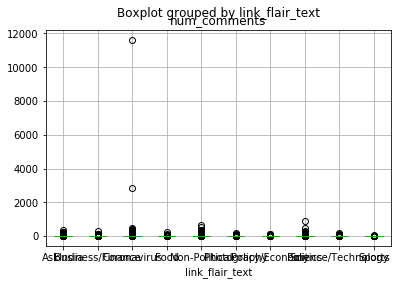

In [109]:
data.boxplot(by = 'link_flair_text', column = ['num_comments'])

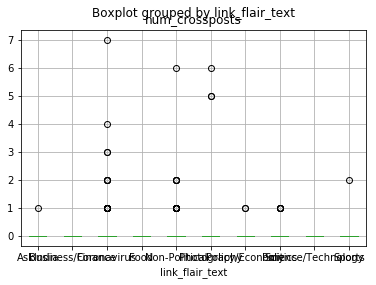

In [110]:
data.boxplot(by = 'link_flair_text', column = ['num_crossposts'])

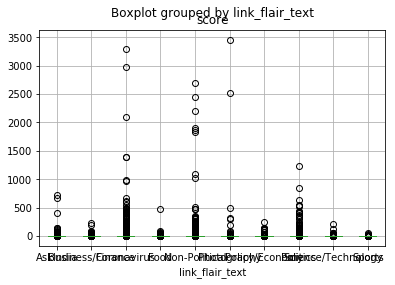

In [111]:
data.boxplot(by = 'link_flair_text', column = ['score'])

Only the title of the submission seemed to be like a useful field and was retained along with the flair type itself.

In [115]:
dataf = data[['title', 'link_flair_text']].copy()

In [116]:
dataf.to_csv('redditData1.csv', index=False) 